In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re

In [38]:
df = pd.read_csv('train.csv')

In [39]:
#Remover a palavra "insurance" 
df['insurance'] = df['insurance'].str.replace('insurance', '')

#Atribuir valor às linhas em branco 
df['insurance'].fillna('No Insurance', inplace=True)

# Espaço em branco nas linhas "Third Party"
df['insurance'] = df['insurance'].str.replace('Third Party ', 'Third Party')

#Remover valores inteiros 
df = df[~df['insurance'].astype(str).str.isnumeric()]


In [40]:
valores_distintos_cc = df['insurance'].unique()
print(valores_distintos_cc)

['Third Party' 'Zero Dep' 'Comprehensive' 'Not Available' 'No Insurance']


In [41]:
#Create kms_group ID: IDF

# Sua coluna de tipos de combustível
insurance = df['insurance']

# Número de documentos (ou entradas) no DataFrame
n_docs = len(df)

idf = {}

# Usando drop_duplicates para obter valores únicos
unique_insurance = insurance.drop_duplicates()

for insurance in unique_insurance:
    k = sum(insurance in row for row in df['insurance'])  # contagem de documentos que contêm este tipo de combustível
    idf[insurance] = np.log10(n_docs / (k + 1))  # Adicionei +1 para evitar divisão por zero

for insurance, value in idf.items():
    print(f'{insurance:>15}: {value:>10}')

# Criar nova coluna 'idf' no DataFrame
df['id_insurance'] = df['insurance'].map(idf)

# Se desejar imprimir o DataFrame com a nova coluna
#print(df)

    Third Party: 0.25909417359300285
       Zero Dep: 1.3210377095336379
  Comprehensive: 0.43933269383026263
  Not Available: 1.4218780161701268
   No Insurance: 3.3663606883202952


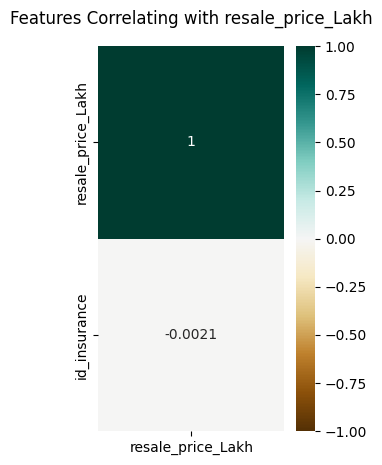

In [42]:
#correlation  

# Select columns
columns_of_interest = ['id_insurance', 'resale_price_Lakh']
subset_df = df[columns_of_interest]

plt.figure(figsize=(3, 5))

# Creat heatmap
heatmap = sns.heatmap(subset_df.corr()[['resale_price_Lakh']].sort_values(by='resale_price_Lakh', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with resale_price_Lakh', fontdict={'fontsize': 12}, pad=16)

plt.show()